# Caching and observability

Motleycrew provides a universal caching engine that caches LLM and tool calls, as well as other web requests out of the box.  
It works with all requests made using most popular Python HTTP clients: `requests`, `HTTPX`, and `Curl CFFI`.

We also provide integration with [Lunary](https://lunary.ai), an open-source observability platform.  
To enable tracking via Lunary, you need to set the `LUNARY_PUBLIC_KEY` environment variable.

We will demonstrate the tracking and caching capabilities on a simple task with one agent and one tool.

In [ ]:
import os
os.environ["OPENAI_API_KEY"] = "<Your OpenAI API key here>"
os.environ["LUNARY_PUBLIC_KEY"] = "<Your Lunary public key here (get it in Lunary settings)>"

In [ ]:
# Alternatively, load everything from .env
from dotenv import load_dotenv
load_dotenv()

In [2]:
from motleycrew import MotleyCrew
from motleycrew.agents.langchain.react import ReActMotleyAgent
from motleycrew.tasks import SimpleTask
from langchain_community.tools import DuckDuckGoSearchRun

In [3]:
from motleycache import enable_cache
enable_cache()  # Caching is on!

In [4]:
crew = MotleyCrew()

duckduckgo_search = DuckDuckGoSearchRun()

writer = ReActMotleyAgent(
    name="writer",
    prompt_prefix="Using the results of a web search, write an article on the latest advancements in AI in 2024.",
    tools=[duckduckgo_search],
)

task = SimpleTask(
    crew=crew,
    agent=writer,
    name="write an article on the latest advancements in AI",
    description="Using the results of a web search, write an article on the latest advancements in AI in 2024. "
                "Write in a way that speaks to the general audience."
)
crew.run()

[TaskUnit(status=done)]

In this example, we'll be looking at the trace view in Lunary interface, which looks like this:  

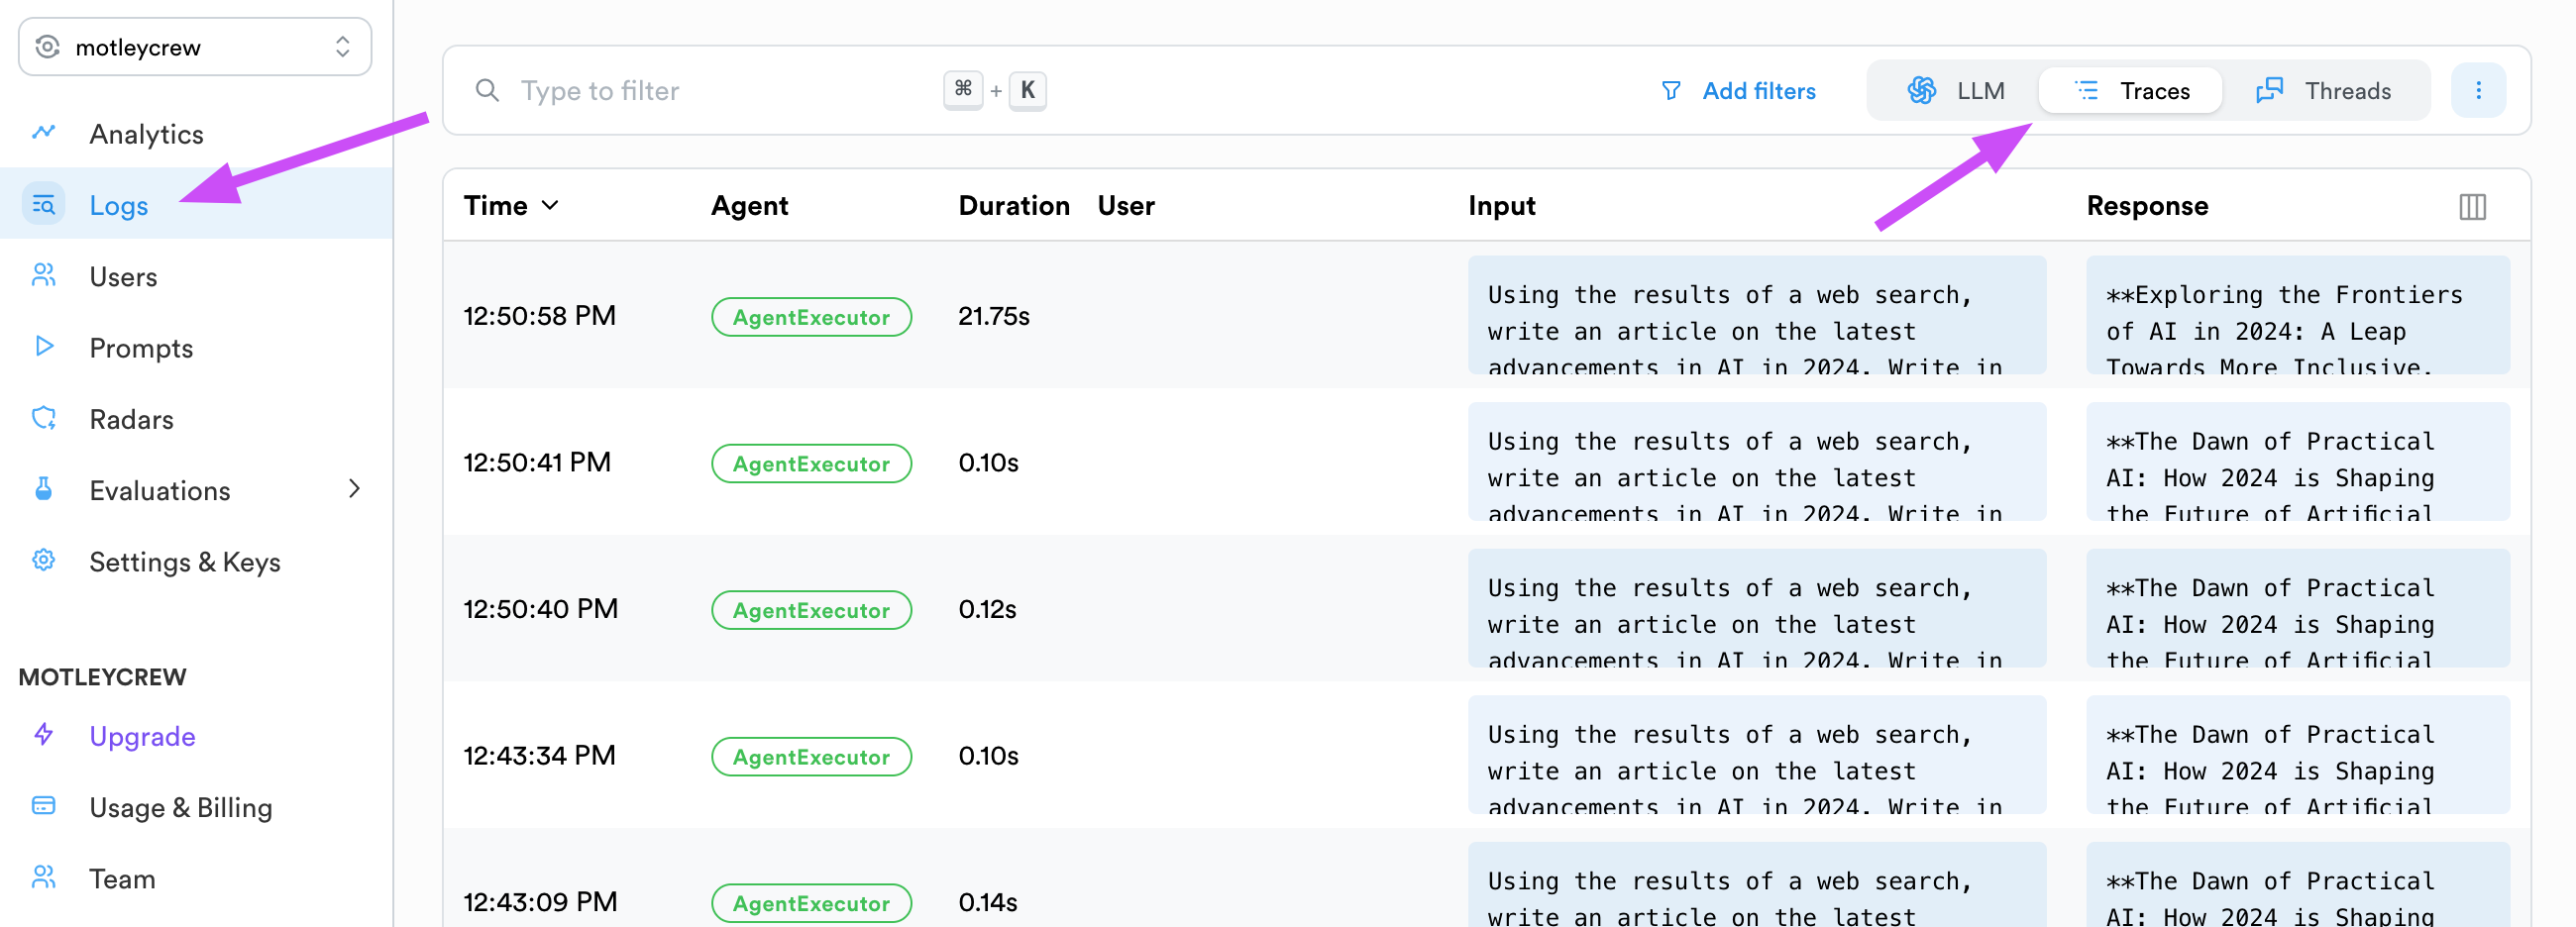

The trace view in Lunary is very useful for looking at what's going on inside your agent.  
In our case it should look something like this:  

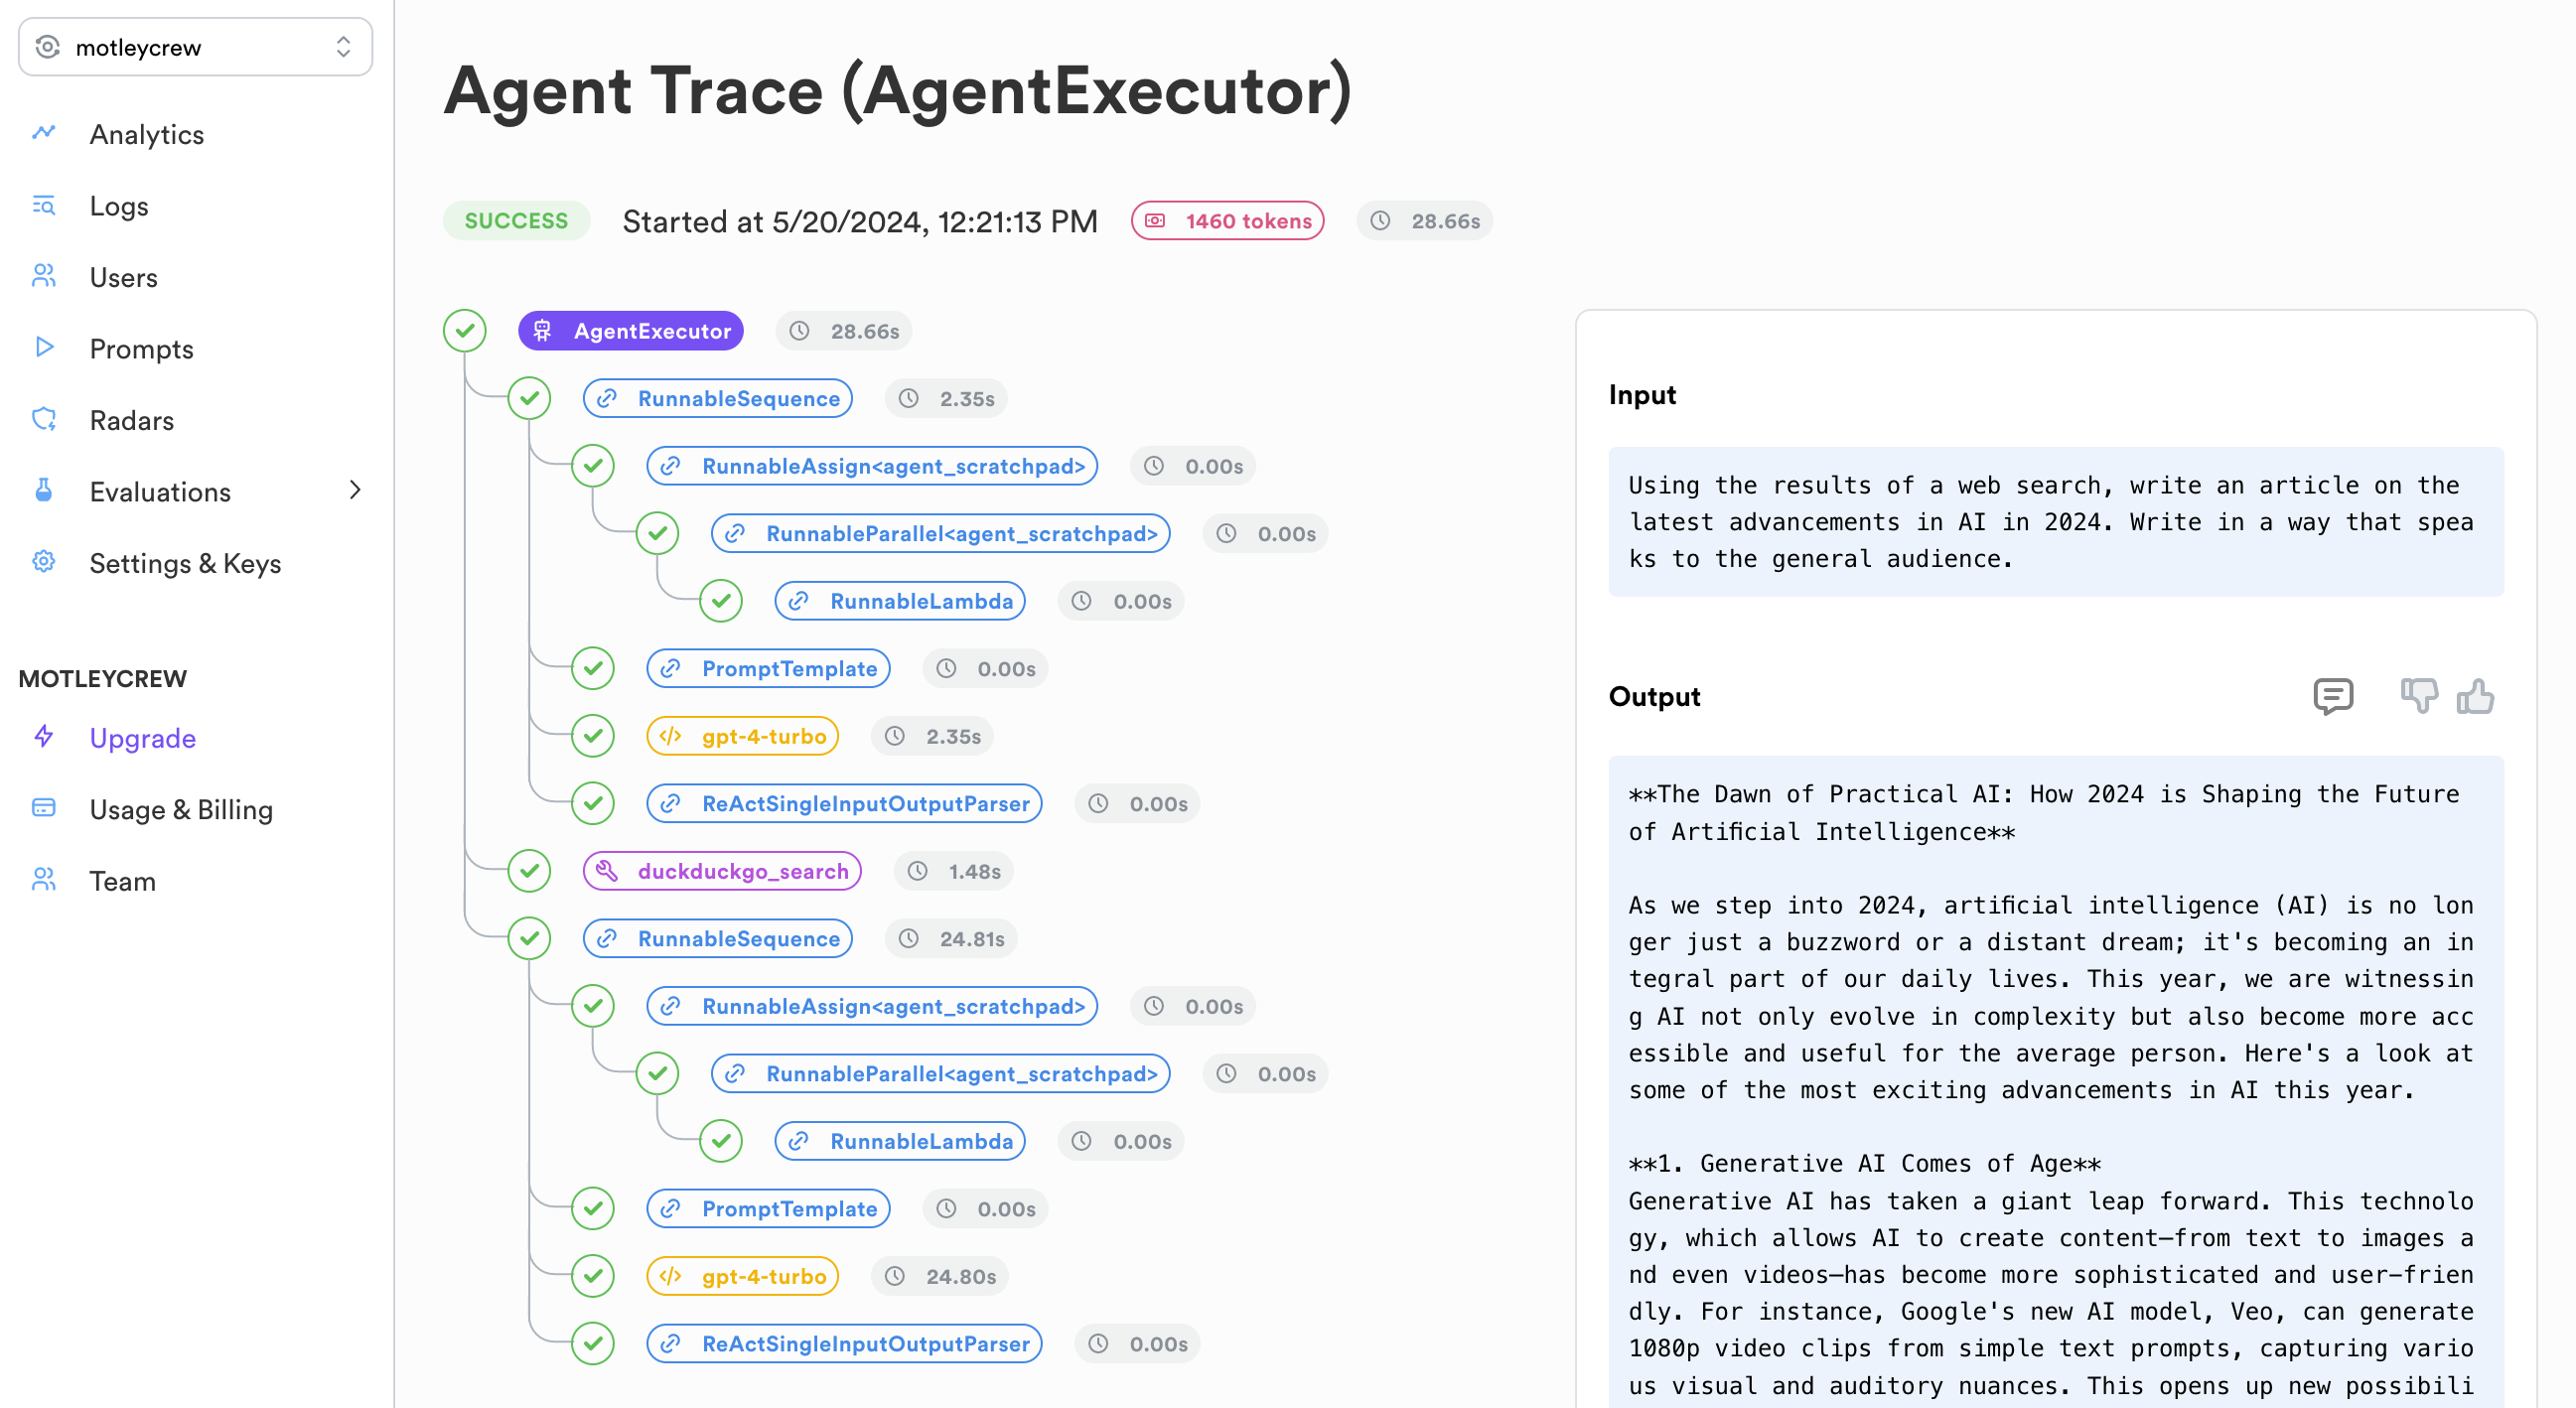

The second call should be cached, let's make sure:

In [5]:
task = SimpleTask(
    crew=crew,
    agent=writer,
    name="write an article on the latest advancements in AI",
    description="Using the results of a web search, write an article on the latest advancements in AI in 2024. "
                "Write in a way that speaks to the general audience."
)
crew.run()

[TaskUnit(status=done)]

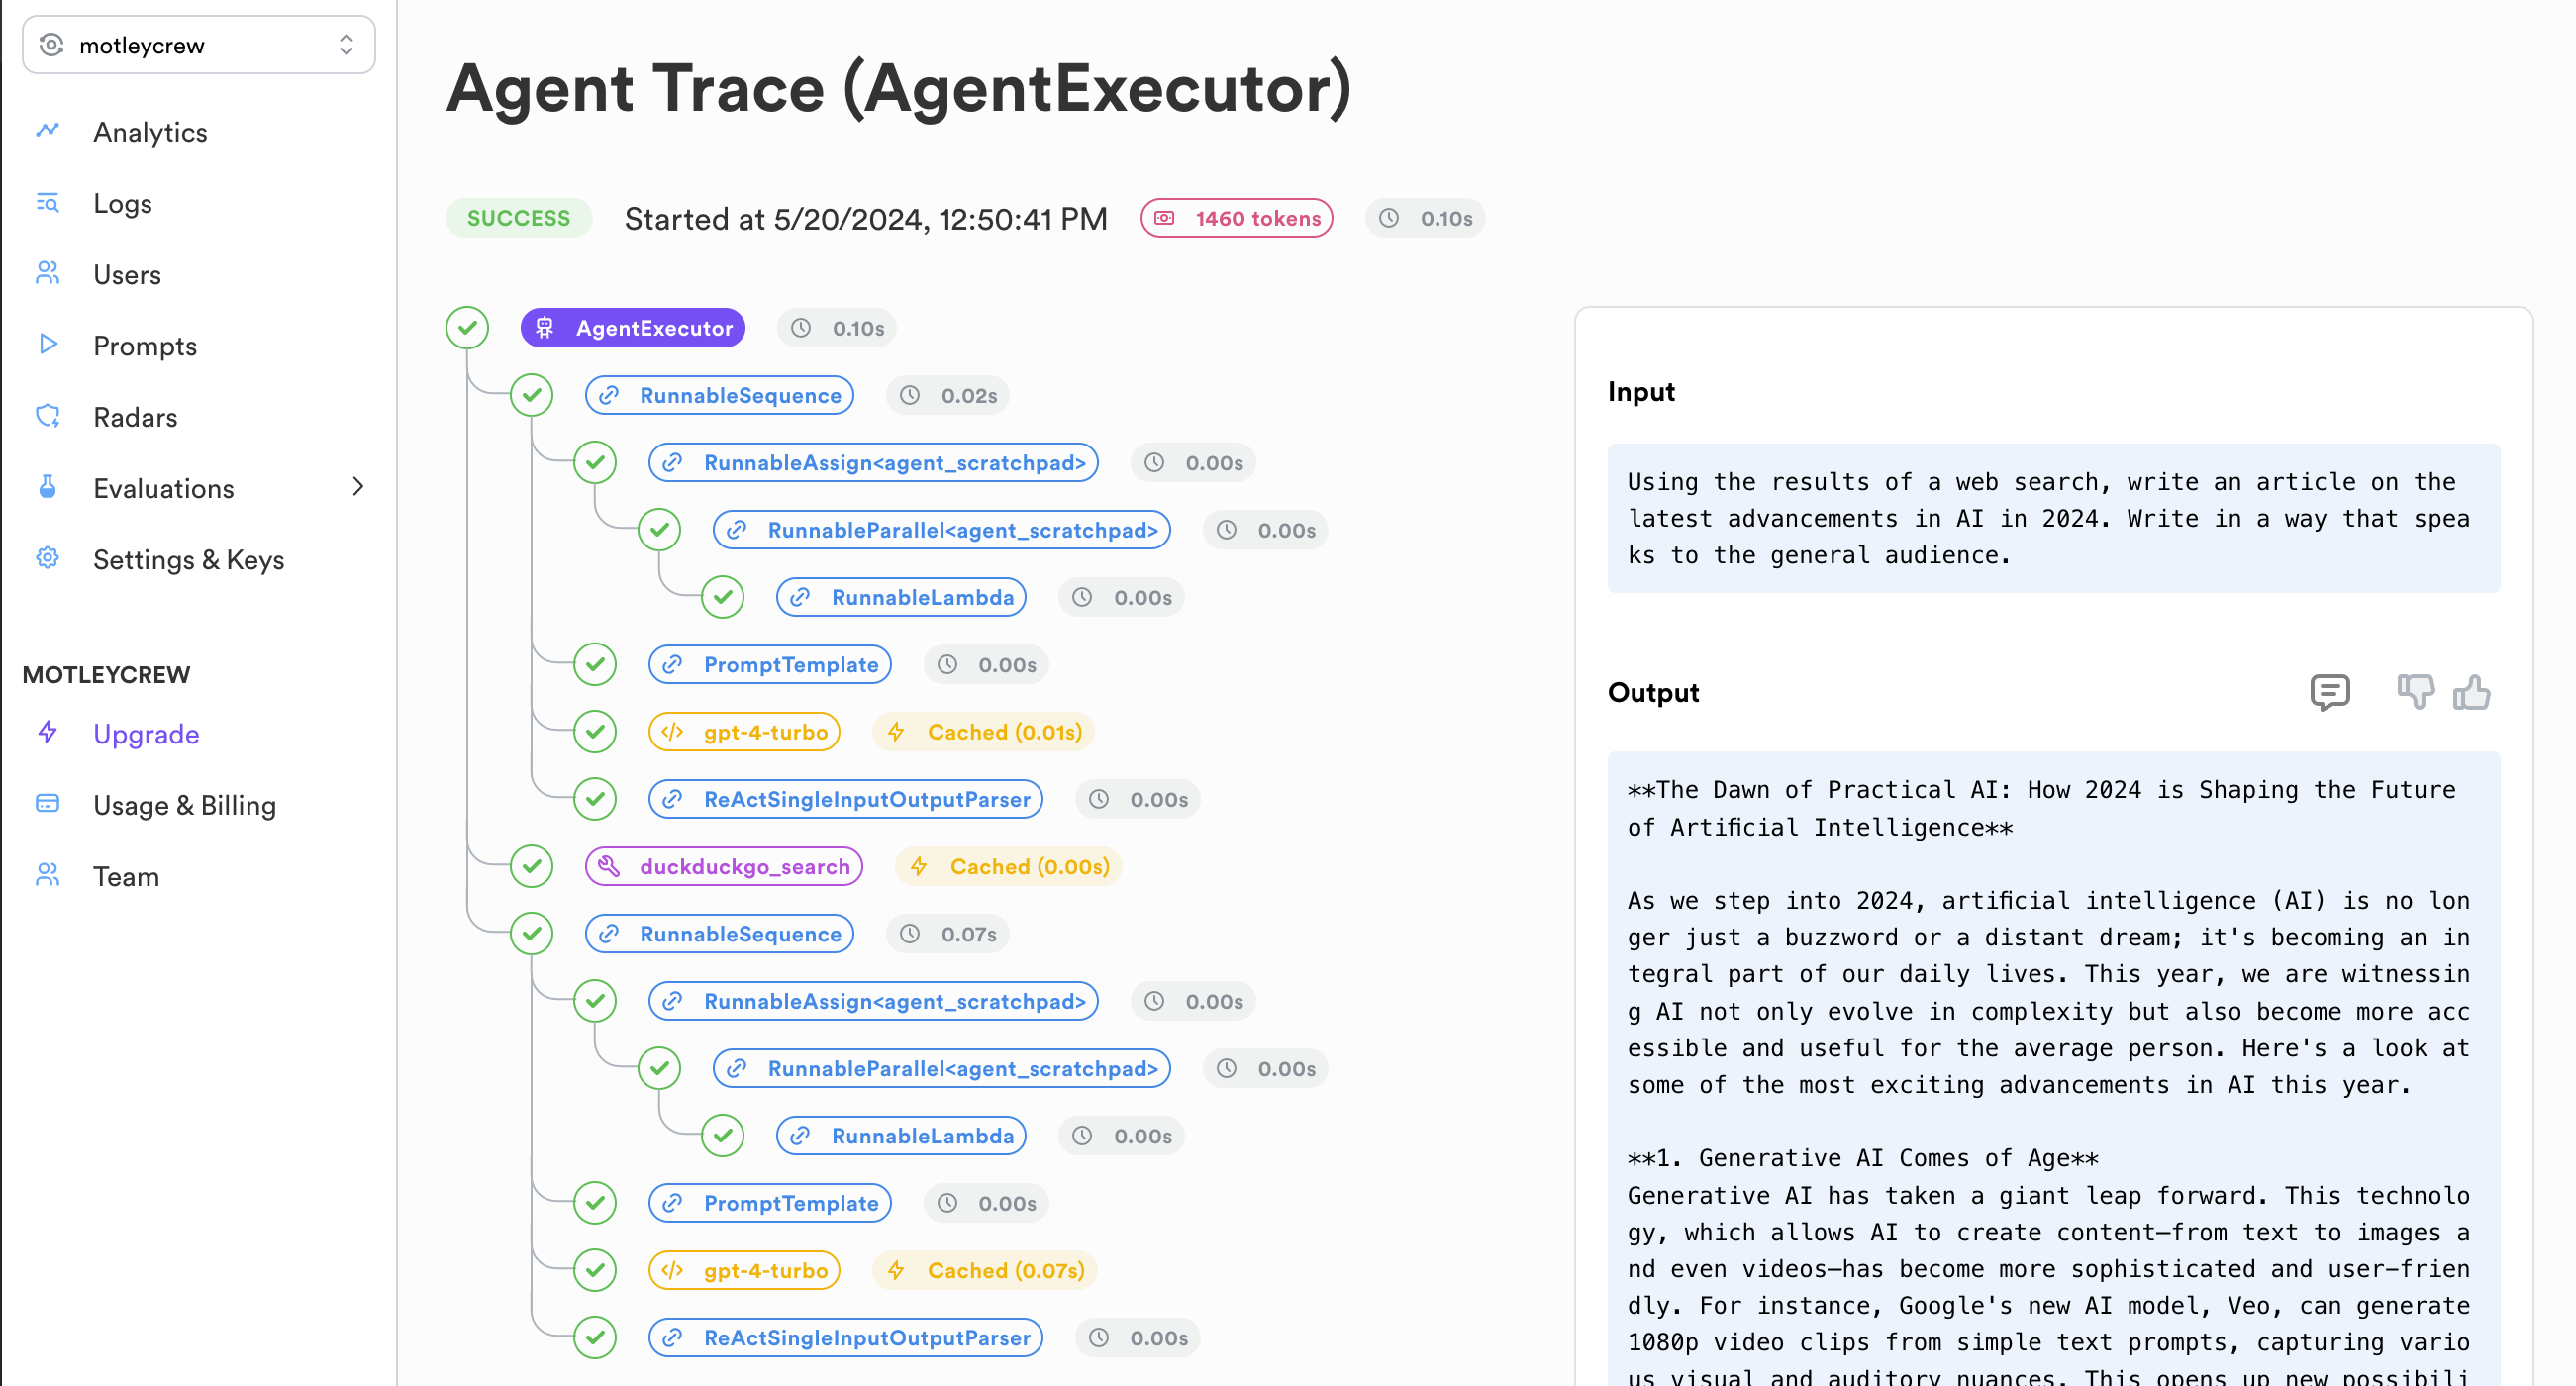

See these **ϟ Cached** badges? Caching worked! 

You can also set the specific URLs which should be cached using a whitelist.

In [6]:
from motleycache import set_cache_whitelist, set_cache_blacklist
set_cache_whitelist(["*//api.openai.com/*"])  # Will only cache OpenAI API requests

# Alternatively, you can specify a blacklist
# set_cache_blacklist(["*duckduckgo.com/*"])

In [7]:
task = SimpleTask(
    crew=crew,
    agent=writer,
    name="write an article on the latest advancements in AI",
    description="Using the results of a web search, write an article on the latest advancements in AI in 2024. "
                "Write in a way that speaks to the general audience."
)
crew.run()

[TaskUnit(status=done)]

Let's see if it worked.  

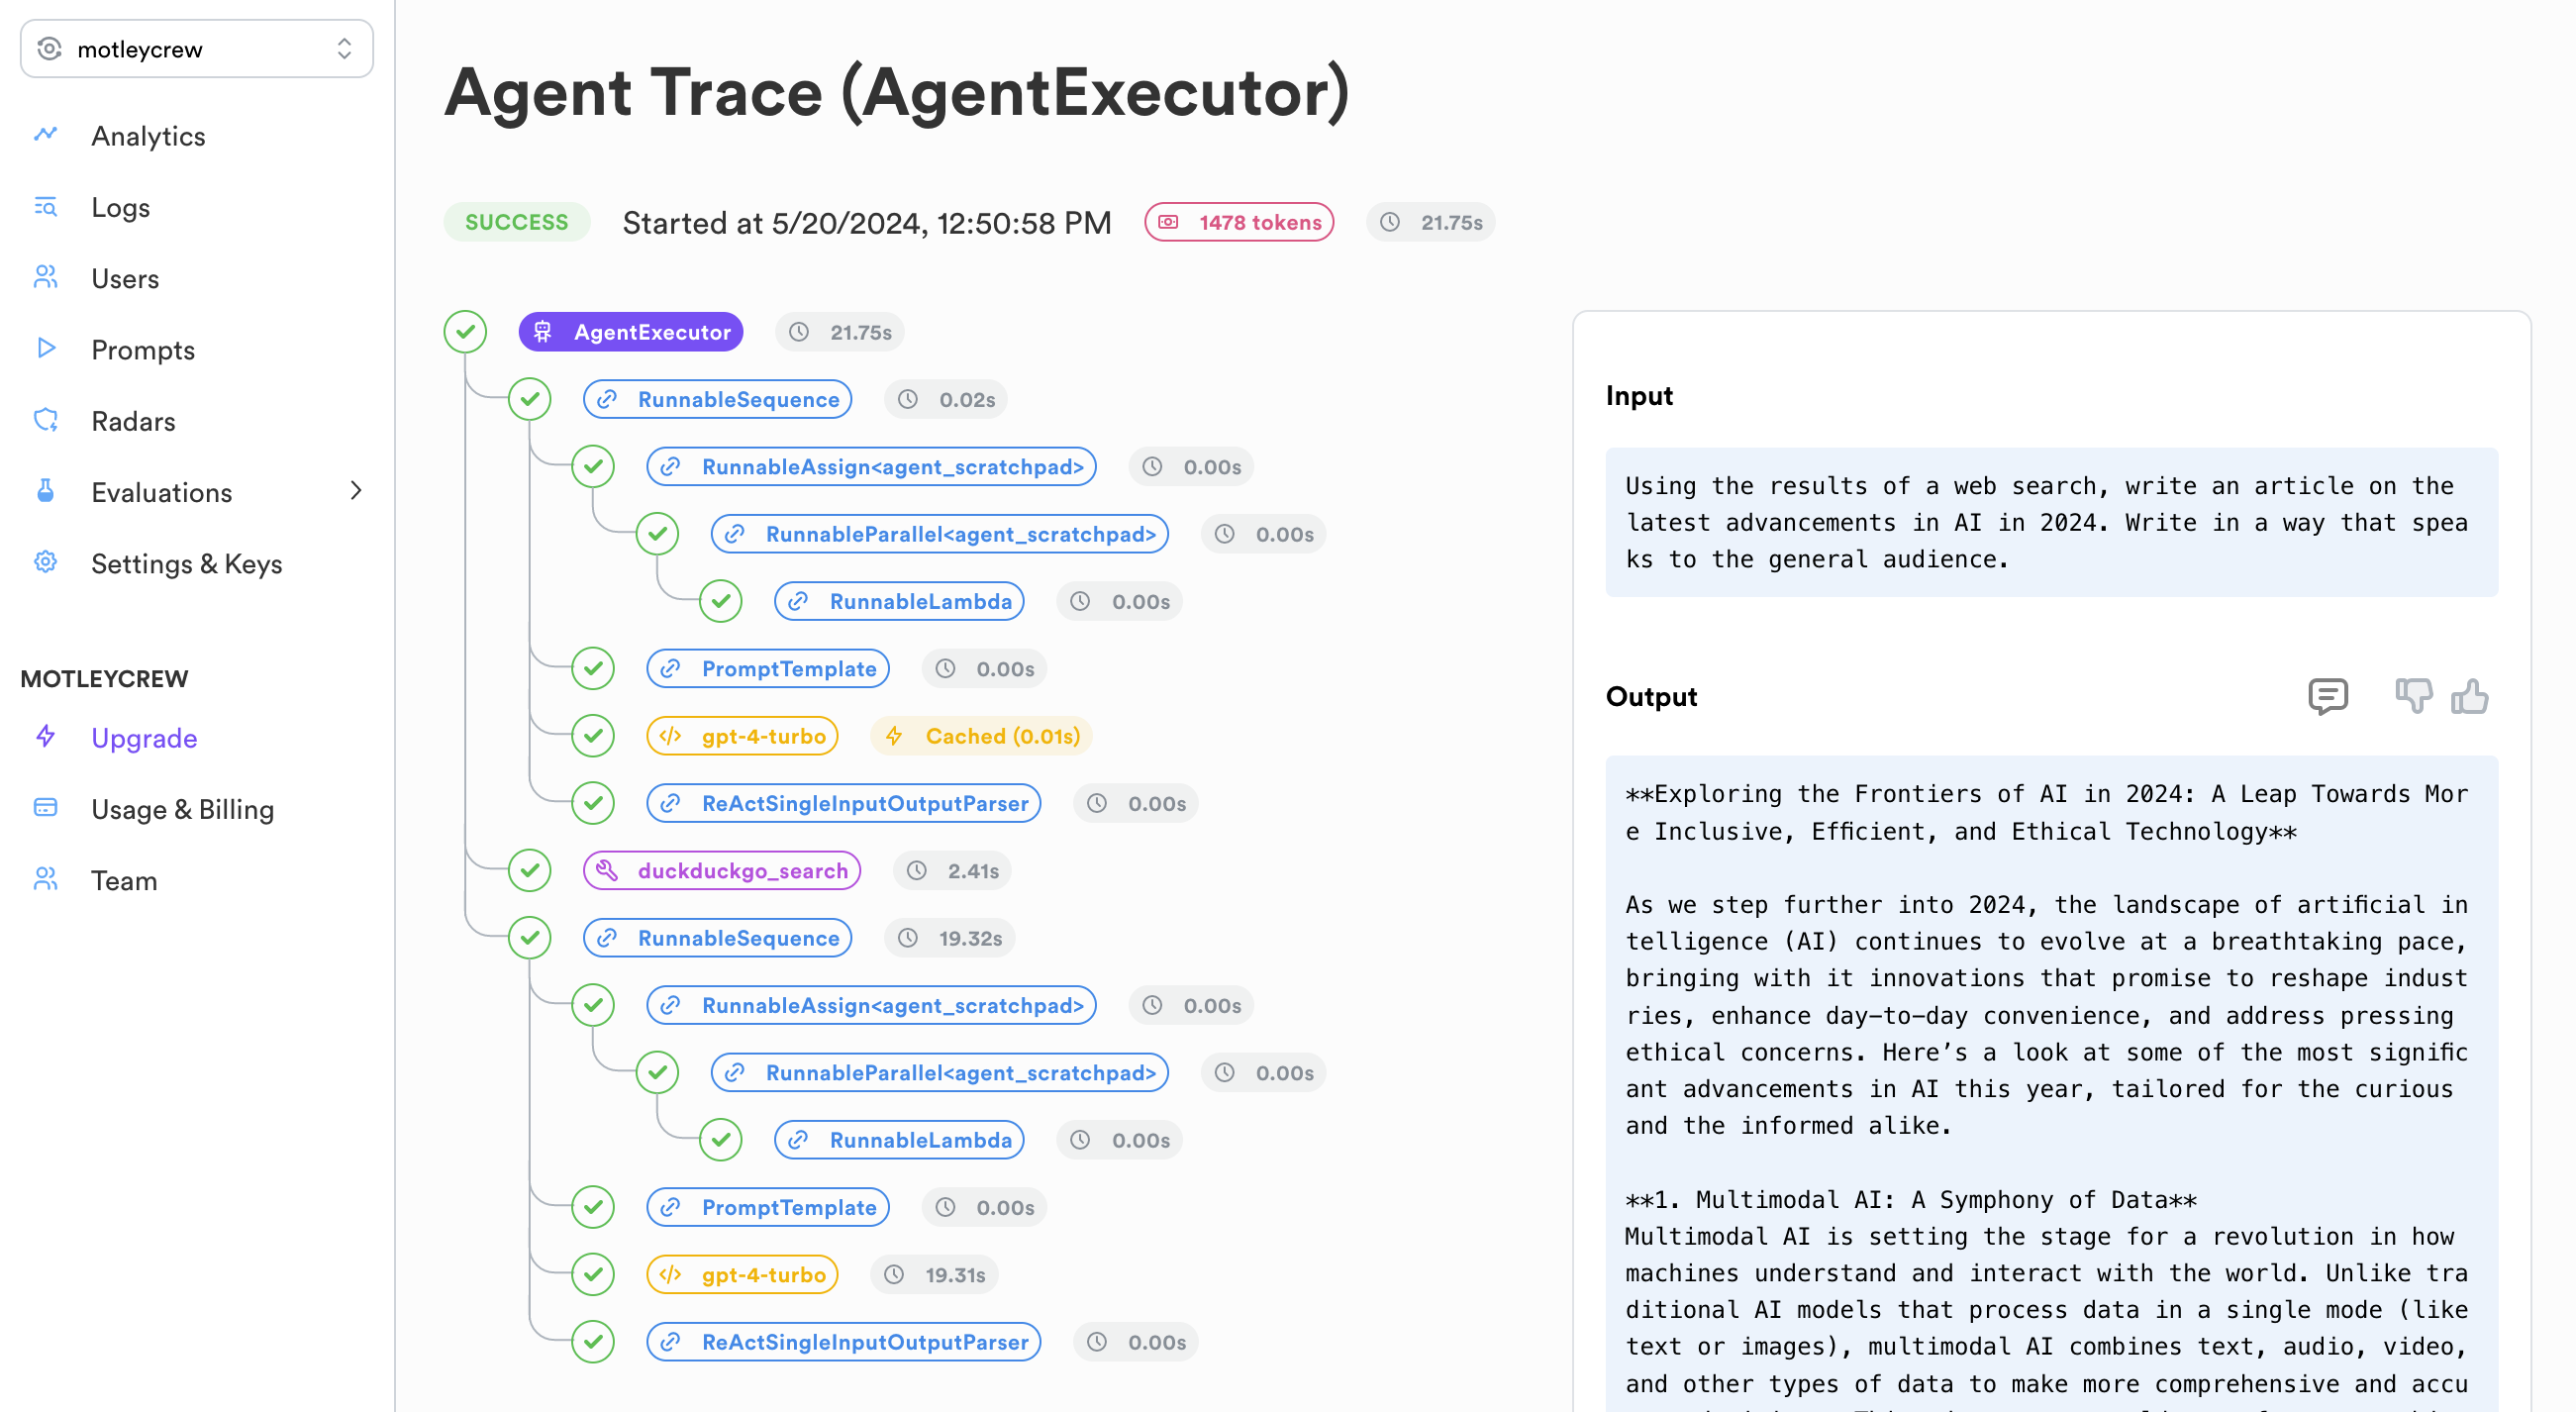

Great! The first request to OpenAI API was a cache hit, but the second was not because the preceding DuckDuckGo search response was different.

In [9]:
from IPython.display import display, Markdown
display(Markdown(task.output))

**Exploring the Frontiers of AI in 2024: A Leap Towards More Inclusive, Efficient, and Ethical Technology**

As we step further into 2024, the landscape of artificial intelligence (AI) continues to evolve at a breathtaking pace, bringing with it innovations that promise to reshape industries, enhance day-to-day convenience, and address pressing ethical concerns. Here’s a look at some of the most significant advancements in AI this year, tailored for the curious and the informed alike.

**1. Multimodal AI: A Symphony of Data**
Multimodal AI is setting the stage for a revolution in how machines understand and interact with the world. Unlike traditional AI models that process data in a single mode (like text or images), multimodal AI combines text, audio, video, and other types of data to make more comprehensive and accurate decisions. This advancement could transform everything from smarter virtual assistants to more intuitive and responsive AI in healthcare diagnostics.

**2. Generative AI in Search Engines**
Imagine typing a query into a search engine and receiving a response generated not just from existing content but also synthesized information that’s tailor-made to answer your questions. That’s the promise of generative AI in search technologies. Companies like Google are pioneering this space, aiming to make search engines more helpful, creative, and contextually aware than ever before.

**3. The Rise of Open Source AI Models**
In a significant shift towards democratization, 2024 has seen a surge in the availability of open source AI models. These models, which are freely available for anyone to use and modify, are empowering businesses of all sizes to innovate and adapt AI technologies without the hefty price tag. This trend is not only accelerating AI adoption across sectors but is also fostering a community of collaboration and transparency in AI development.

**4. Ethical AI Takes Center Stage**
As AI becomes more integrated into critical areas such as law enforcement, healthcare, and public services, the focus on developing ethical AI has never been more intense. This year, we’ve seen a concerted effort from developers, regulators, and ethicists to address AI bias, ensure privacy, and secure user data, aiming to build trust and fairness in AI applications.

**5. Integration of AI Leaders**
Interestingly, 2024 has also witnessed a shift in how organizations structure their leadership around AI and data strategies. With a growing recognition that AI and data are interlinked at a fundamental level, more companies are merging roles like Chief Data Officer and Chief AI Officer to foster more cohesive and strategic oversight.

As AI continues to advance, the focus is increasingly on not just making machines smarter, but also making them more responsible, inclusive, and beneficial for all. The journey of AI in 2024 is not just about technological innovation but also about steering these technologies towards a future that aligns with our human values and collective well-being.

## Lunary and self-hosting

We decided to use Lunary because it's open-source and provides a free tier for the hosted platform as well as the ability to self-host.  

In most cases, the hosted Lunary, or its self-hosted [plan](https://lunary.ai/docs/self-host) with pre-built Docker images and support will be the natural option. However, in cases where that's not possible or desired, it's also possible to run it locally from the source code. The basic instructions are available in the [Lunary repository](https://github.com/lunary-ai/lunary?tab=readme-ov-file#running-locally). 

A basic ready-to-go Docker configuration is available in this fork: [whimo/lunary](https://github.com/whimo/lunary), see the [instructions](https://github.com/whimo/lunary/blob/main/DOCKER_HOWTO.md) for setting up a container. Note that the fork is not guaranteed to be up-to-date with the original Lunary repository.